# Student Performance Indicator

## Life Cycle Of Machine Learning Project 

- Understanding the problem statement

- Data Collection

- Data checks to perform

- Exploratory Data Analysis

- Data Pre-Processing

- Model Training

- Choose best model


## 1)Problem Statement 

.This project understand how the student's performance (test scores) is affected by other variable such as gender,ehnicity,parental level of eduaction,lunch and test preparation course


## 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

### 2.1) Import Data and required packages


### Importing Pandas,Numpy,Matplotlib,Seaborn and warnings library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the csv Data as pandas dataframe

In [2]:
df=pd.read_csv(r'F:\Resume_ML_Projects\End_To_End_ML_Project1\notebook\data\Stud.csv')


### Show top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset 

In [4]:
df.shape

(1000, 8)

## 2.2 Dataset Information 

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3.Data Checks to perform

- ckeck missing values
- check dublicates
- check data type
- check the no of unique values of each column
- check statistics of dataset
- check various categories are present in the different categorical columns


### 3.1 Check  Misiing values 

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

###  There are no missing values in the data set

### 3.2)  Check Duplicates

In [6]:
df.duplicated().sum()

0

### There are no duplicates values in the dataset 

### 3.3)Check Data Types



In [7]:
#check data types and Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the no of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check statistics of dataaset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight 

- from above description of numerical data ,all means are very close to each other->between 66 and 68.05
- All standard deviation are also close-between 14.6 nd 15.19
- while there is minimum score 0 for math,for writting minimum is much higher=10 and for reading much higher =17

### 3.7 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:",end=' ')
print(df['gender'].unique(),"\n")
print("Categories in 'race_ethnicity' variable:",end=' ')
print(df['race_ethnicity'].unique(),"\n")
print("Categories in 'parental_level_of_education' variable:",end=' ')
print(df['parental_level_of_education'].unique(),"\n")
print("Categories in 'lunch' variable:",end=' ')
print(df['lunch'].unique(),"\n")
print("Categories in 'test_preparation_course' variable:",end=' ')
print(df['test_preparation_course'].unique(),"\n")

Categories in 'gender' variable: ['female' 'male'] 

Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in 'lunch' variable: ['standard' 'free/reduced'] 

Categories in 'test_preparation_course' variable: ['none' 'completed'] 



### Define numerical and categorical columns


In [12]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

#print columns
print('we have {} numerical features:{}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features:{}'.format(len(categorical_features),categorical_features))



we have 3 numerical features:['math_score', 'reading_score', 'writing_score']
we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [13]:
df['total_score']=df['writing_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,220,73.333333
1,female,group C,some college,standard,completed,69,90,88,266,88.666667
2,female,group B,master's degree,standard,none,90,95,93,281,93.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,145,48.333333
4,male,group C,some college,standard,none,76,78,75,228,76.000000


In [14]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20=df[df['reading_score']<=20]['average_score'].count()
writing_less_20=df[df['writing_score']<=20]['average_score'].count()
math_less_20=df[df['math_score']<=20]['average_score'].count()

print(f"number of students with less than 20 marks in maths: {math_less_20}")
print(f"number of student with less than 20 marks in writing:{writing_less_20}")
print(f"number of students with less than 20 marks in reading:{reading_less_20}")



number of students with less than 20 marks in maths: 4
number of student with less than 20 marks in writing:3
number of students with less than 20 marks in reading:1


### Insights


- from above values we get studentshave performed the worst in maths
- best performance is in reading section

## 4.Exploring Data(Visualization) 

### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernal Distribution Function

####  4.1.1 HISTOGRAM & KDE

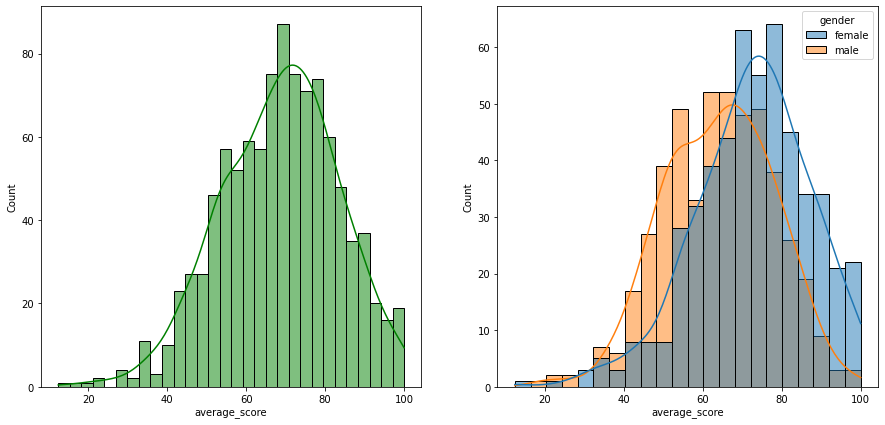

In [16]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()


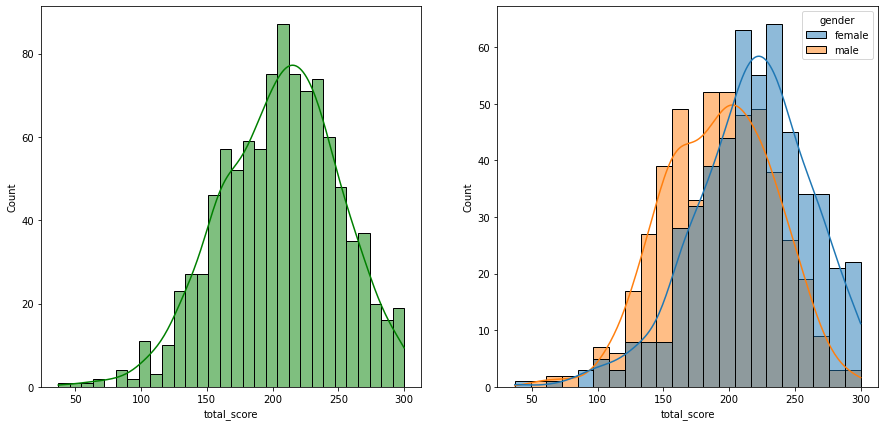

In [18]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

### Insights

- Female Students tend to perform well than male students.

In [18]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

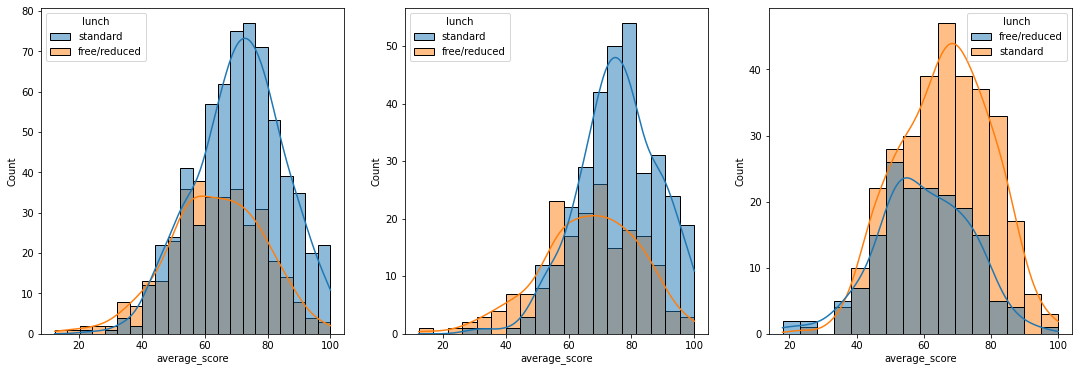

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()


### Insights

- standard lunch helps perform well in exams
- standard lunch helps perform well in exams  be it a male or female 

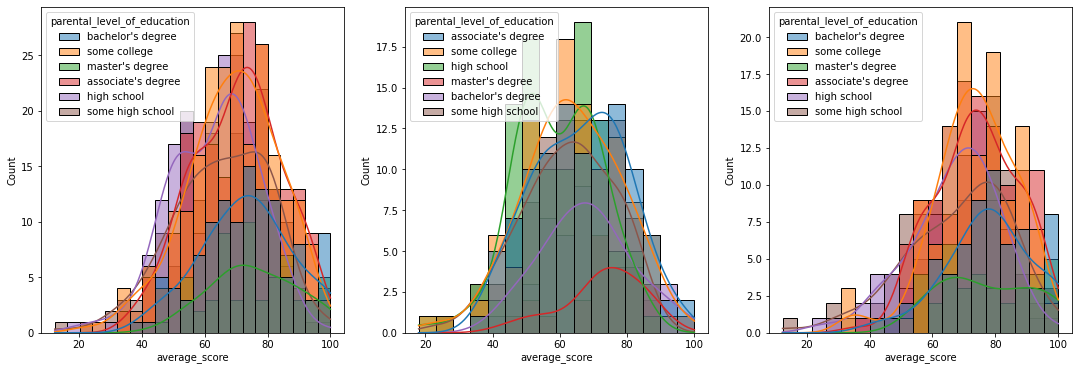

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

## Insights

- In general parents's eduacation don't help student perform well in exam
- 2nd plot shows that parent's whose eduaction is of associate's degree or master's degree their male child tend to perform weel in exam.
- 3rd plot we can see there is no effect of parent's eduaction on female students.


### 4.2 Maximum score of students in all three subjects 

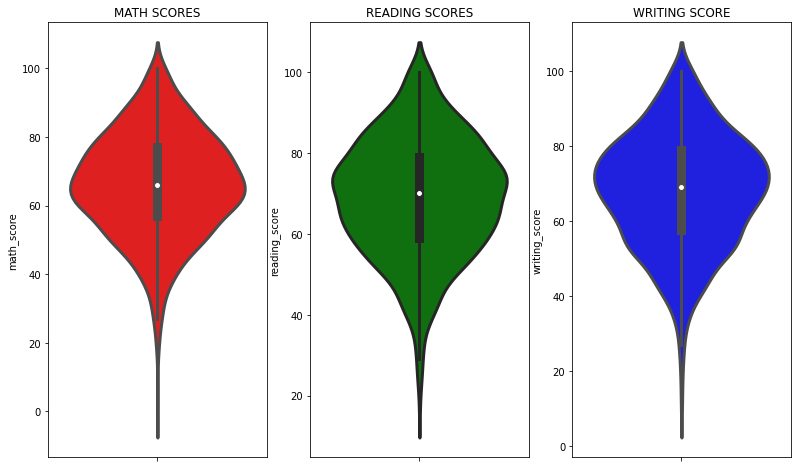

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


### INSIGHTS

- from the above three plots its clearly visible that most of the students score in between 60-80in maths,whereas in reading and writing most of them score from 50-80

## 4.3 Multivariate analysis using pieplot

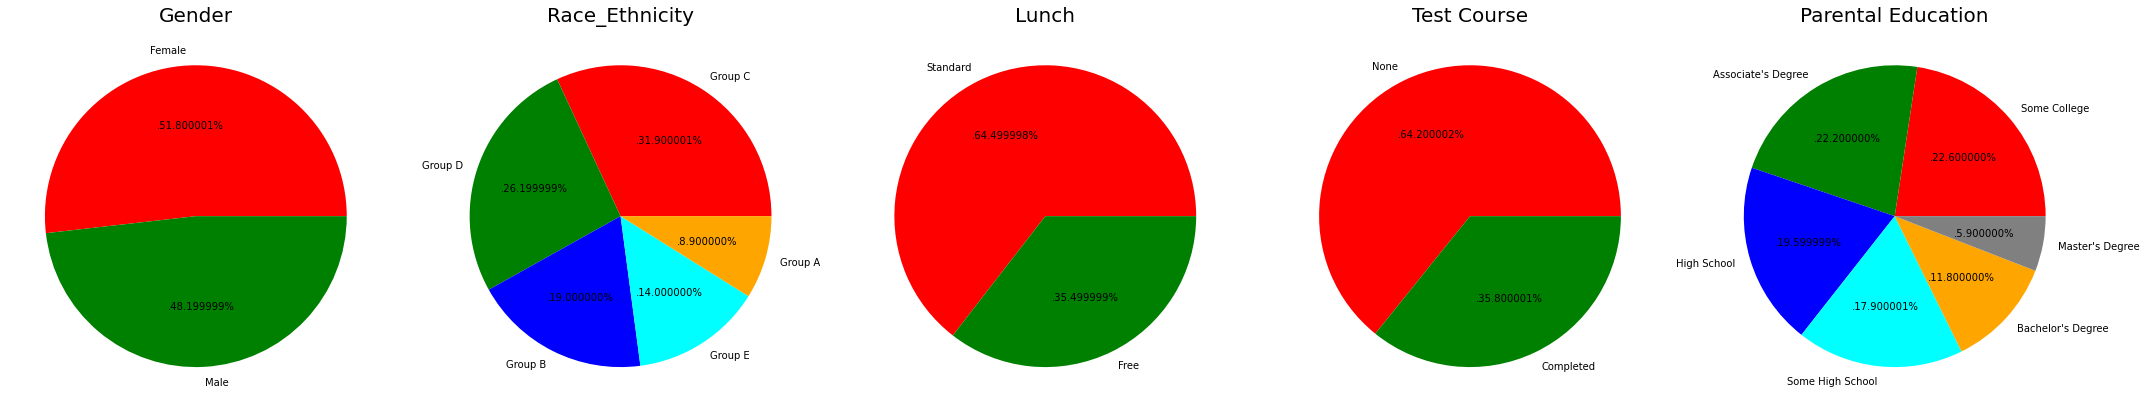

In [25]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


### Insights

- no of male and female students is almost equal
- no of students are greatest in Group C
- no of student who have standard lunch are greater
- no of students who have not enrolled in any test preparation course is greater 
- no of students whose parental eduacation is "Some college " is greater followed closely by "Associate's Degree"

## 4.4 Feature wise Visualization

### 4.4.1 Gender column

- How is distribution of Gender?
- Is gender has any impact on student's performance?

## Univariate Analysis(How is distribution of gender?)

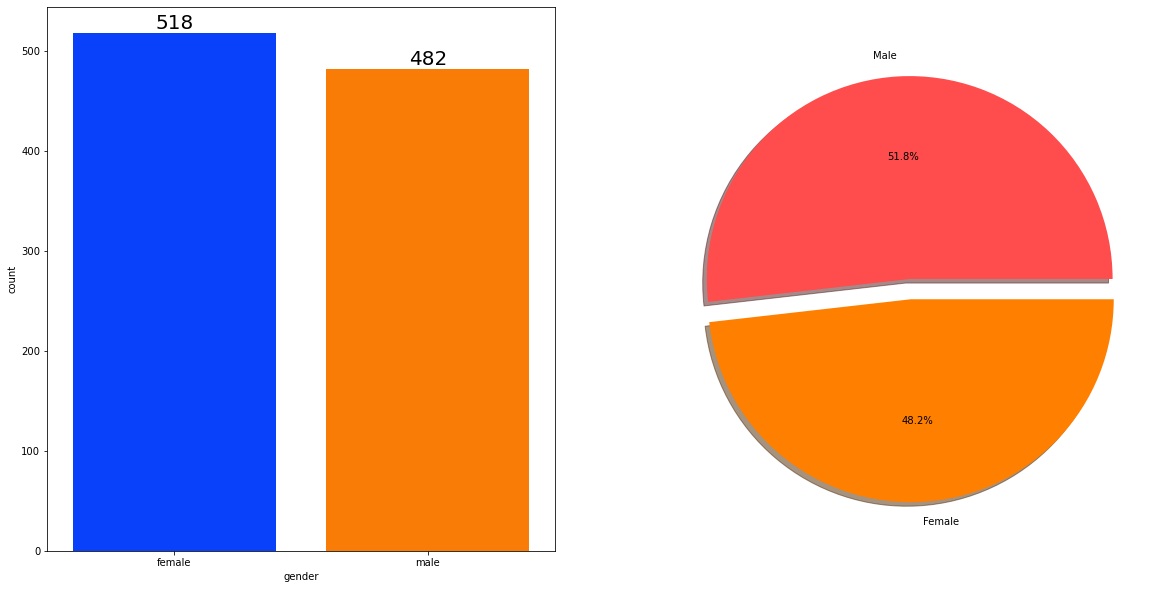

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights

- Gender has balanced data with female students are 518(48%) and male students are 482(52%)

## Bivariate Analysis (is gender has any impact on student's performance?)

In [27]:
gender_group=df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,217.542471,72.514157
male,68.728216,65.473029,63.311203,192.095436,64.031812


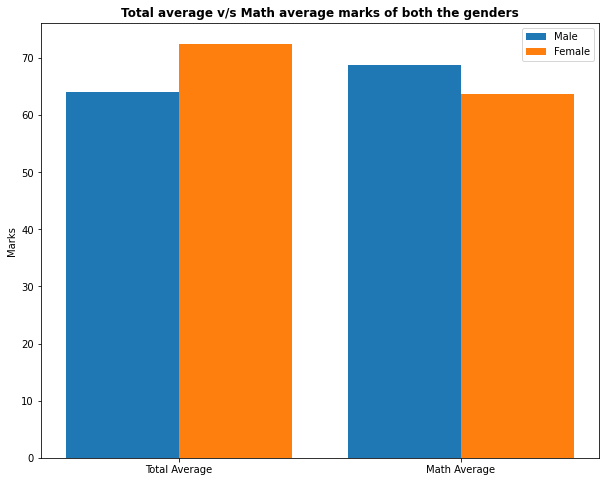

In [29]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights

- on an average females have better overall core than male
- whereas males have second higher in maths

## 4.4.2 Race/Ethnicitycolumn

- How is group wise distribution?
- is Race/Ethnicity has any impact on student's performance?

### Univariate analysis (How is group wise distribution?)

In [30]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

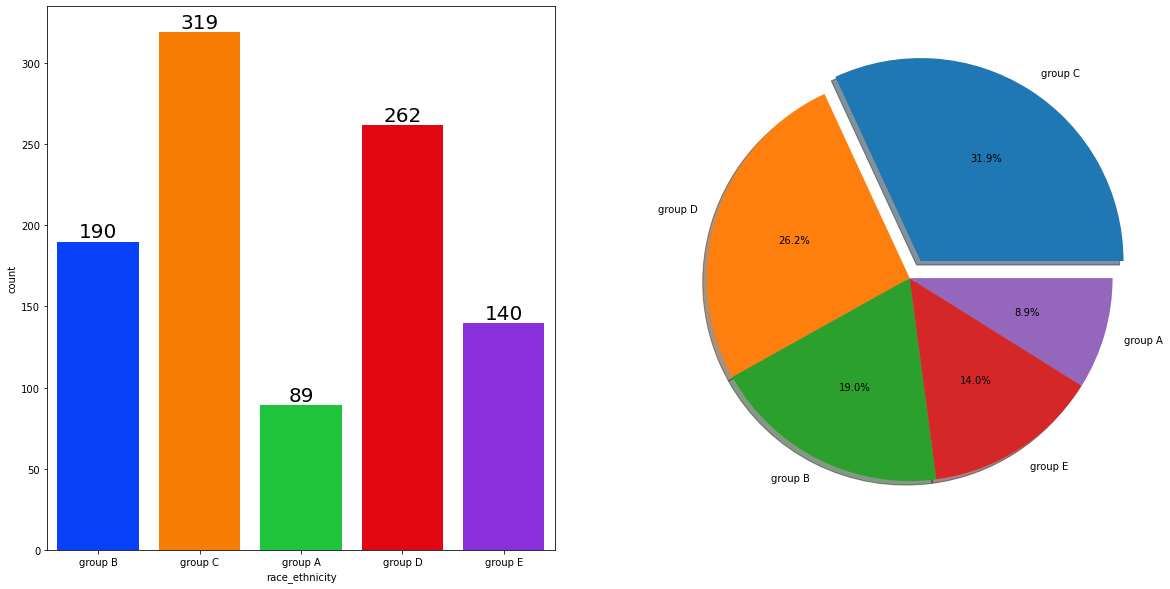

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

### Insights

- Most of the students belonging from group c/group d.
- Lowest no of students belongs to category A

## Bivariate Analysis(Is race/ethnicityhas any imapct on student's performance?)

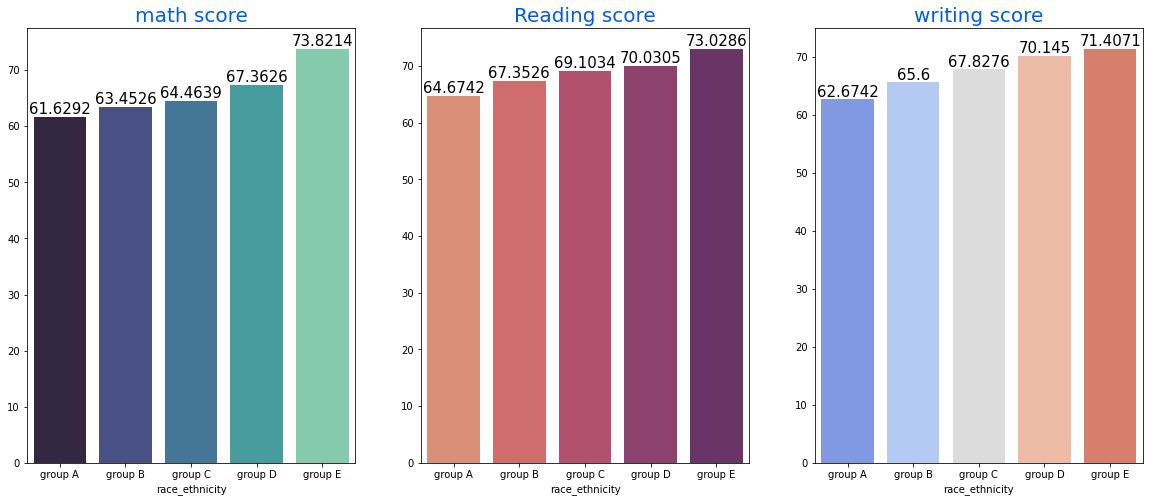

In [32]:
group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)


for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights

- group E students have scored the highest marks.
- group A students have scored the lowest marks
- students from a lower socioeconomics status have a lower average in all course subjects.

### 4.4.3 Parental level of eduaction column

- what is eduactional background of student's parent?
- is parental education has any impact on student's performance?

## Univariate analysis (what is eduacational background of student's parent?)

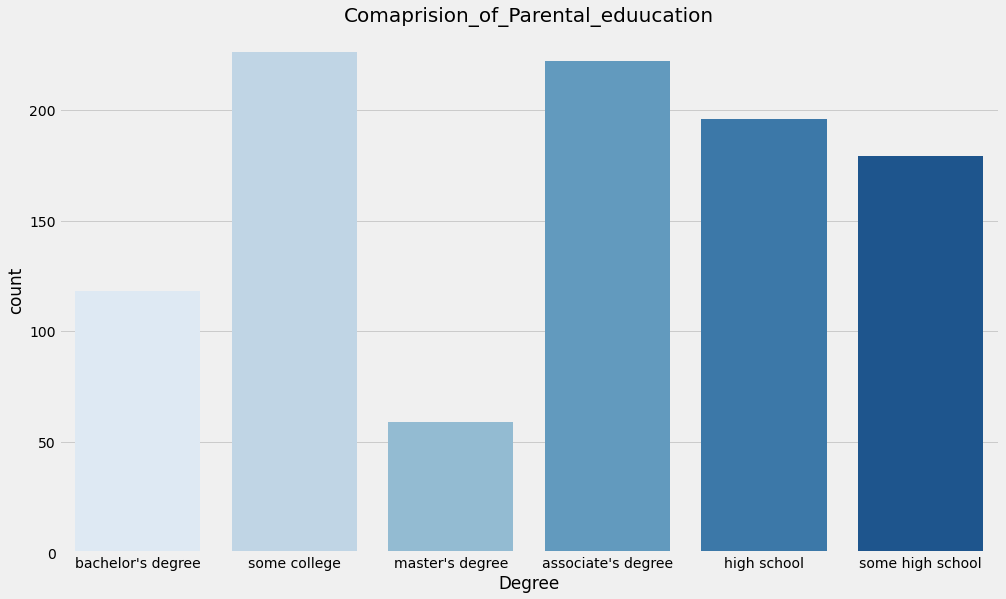

In [33]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comaprision_of_Parental_eduucation',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insight

- Larger no of parent are from some college.

## Bivariate analysis (is parental education has any impact on student's perforance?)

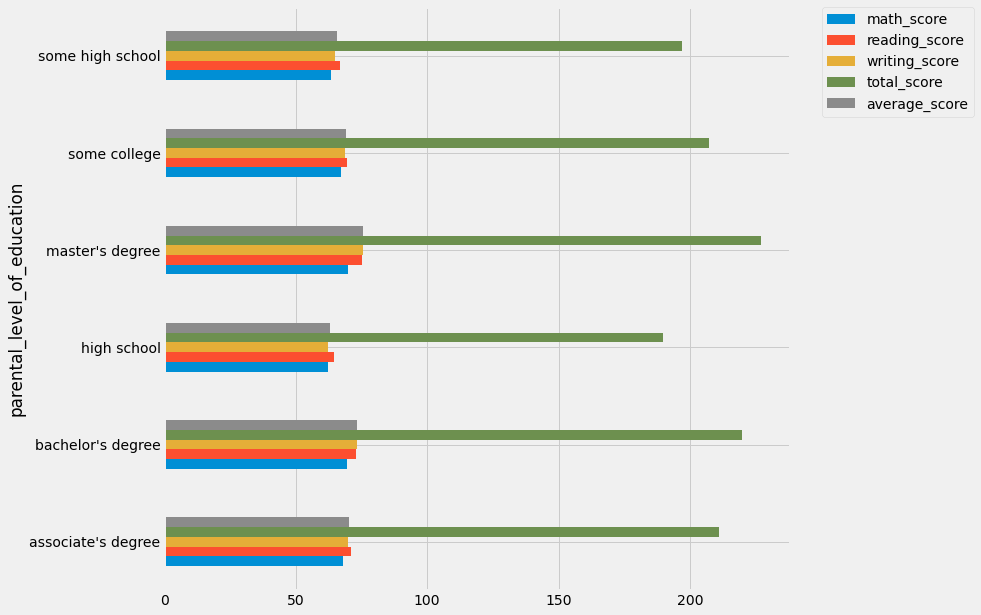

In [34]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

### Insight

- The score of student whose parent possess masters and bechelor level education are higher than others.

### 4.4.4 Lunch column

- Which type of lunch is most common among students?
- what is the effect of lunch type on test results?

## Univariate analysis(which type of lunch is most common among students? )

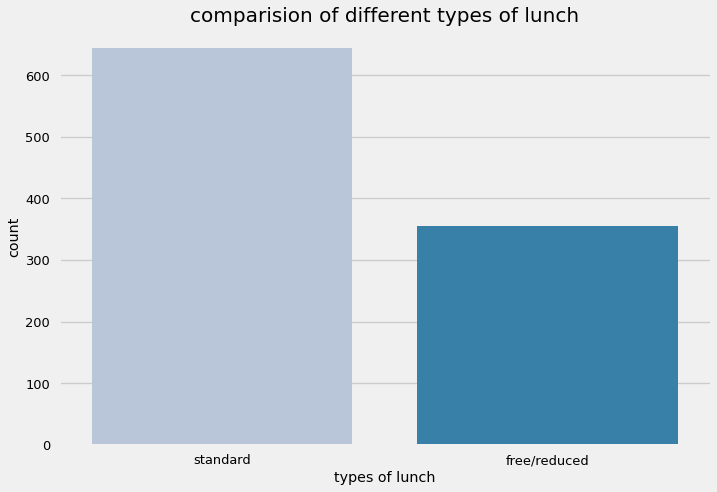

In [35]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('comparision of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Insight:

- Students being served standard lunch was more than free lunch 

## Bivariate analysis(Is lunch type intake has any impact on student's performance)

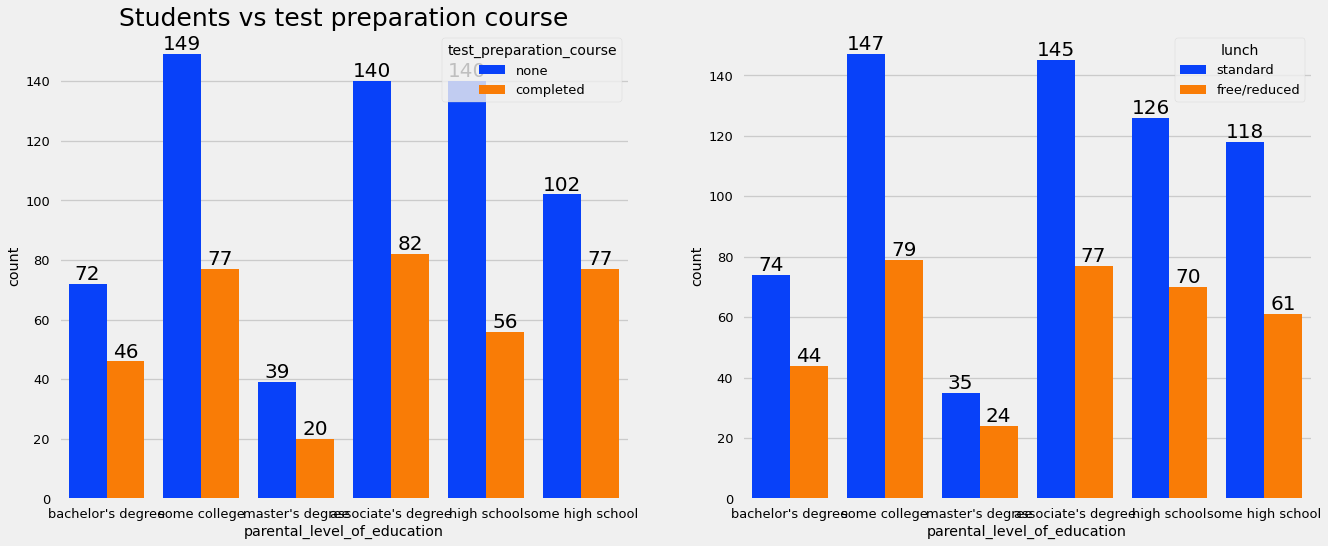

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)


### Insights:

- Students who get Standard Lunch tend to perform betten than students who got free/reduced lunch

## 4.4.5 Test preparation course column

- Which type of lunch is most common among tudents?
- is test preparation course has any impact on student's performance?

### Bivariate analysis (is test preparation course has any impact on student's performance ?)

<AxesSubplot: xlabel='lunch', ylabel='writing_score'>

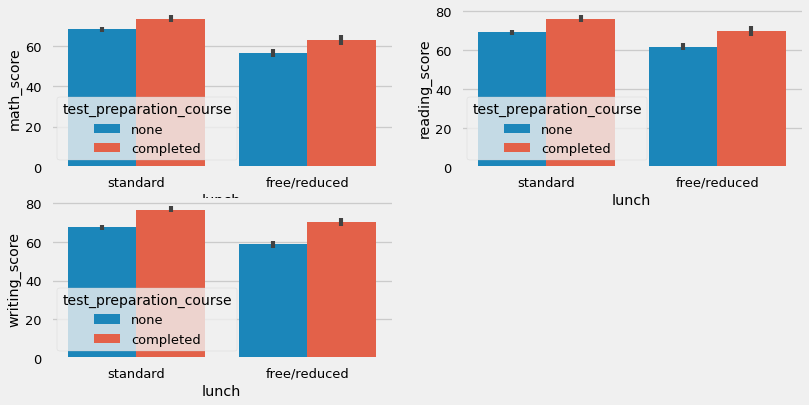

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'])


### Insights:

- Students who have completed the Test Preparation course have scores higher in all three categories than those ho have not taken the course.

## 4.4.6 Checking outliers

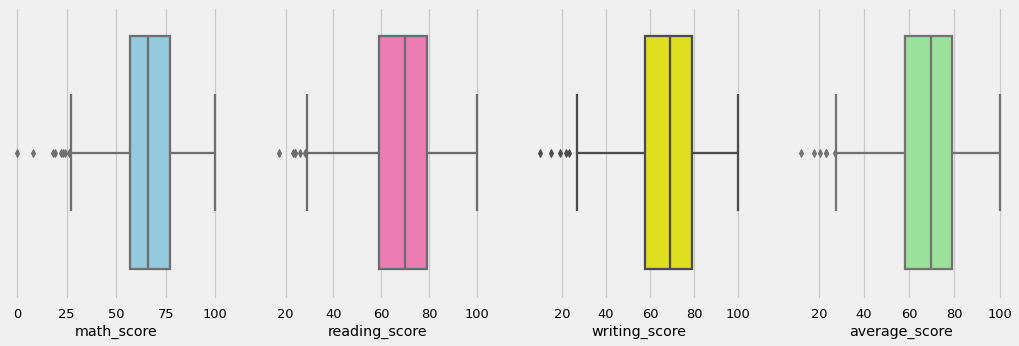

In [38]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

## 4.4.7 Multivariate analysis using pairplot

In [ ]:
sns.pairplot(df,hue='gender')
plt.show()

### Insights


- from the above plot it is clear that all the score increase linearly with each other

## 5.Conclusion

- Student's performance is realated with lunch,race,parental level of education
- Females lead in pass percentage and also are top-scores
- student's performance is not much related with test preparation course
- finishing preparation course is beneficial